In [1]:
# import relevant packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [2]:
# read the data from a csv file and print a preview
file_path = '../data/processed/df_cleaned.csv'
df = pd.read_csv(file_path)

print(df.head())


   Min Delay  Season       Day Time Period             Station Bound Line  \
0          6  Winter  Saturday     Morning       FINCH STATION     S   YU   
1          5  Winter  Saturday     Morning  KENNEDY BD STATION     W   BD   
2          6  Winter  Saturday     Morning       FINCH STATION     S   YU   
3          3  Winter  Saturday     Evening    EGLINTON STATION     S   YU   
4          3  Winter  Saturday     Evening    EGLINTON STATION     S   YU   

   Min Gap               Issue Category  
0       12  Human & Operational Factors  
1       10  Human & Operational Factors  
2       12  Human & Operational Factors  
3       10                        Other  
4       10                        Other  


In [3]:
# Separate features and target variable
X = df.drop('Min Delay', axis=1)  # Features
y = df['Min Delay']               # Target


In [4]:
# Define the categorical columns
categorical_features = ['Season', 'Day', 'Time Period', 'Station', 'Bound']

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [5]:
# Create a pipeline with preprocessing and Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [6]:
# split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Season', 'Day',
                                                   'Time Period', 'Station',
                                                   'Bound'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [8]:
# Make predictions
y_pred = model.predict(X_test)


In [9]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 29.56296489631556
R-squared: -0.3610799969289764


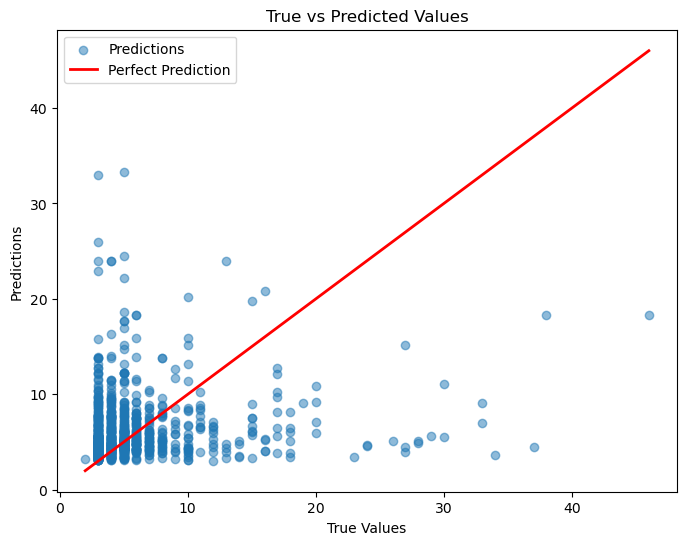

In [10]:
# plot predictions vs actuals
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


In [11]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.6s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.6s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.6s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.5s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time=   0.8s
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=150; total time=   0.8s
[CV] END regressor__max_depth=None, regressor__min_samp

In [12]:
# After GridSearchCV, get the best model from the search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21.623845053511715
R-squared: 0.004437374185886189


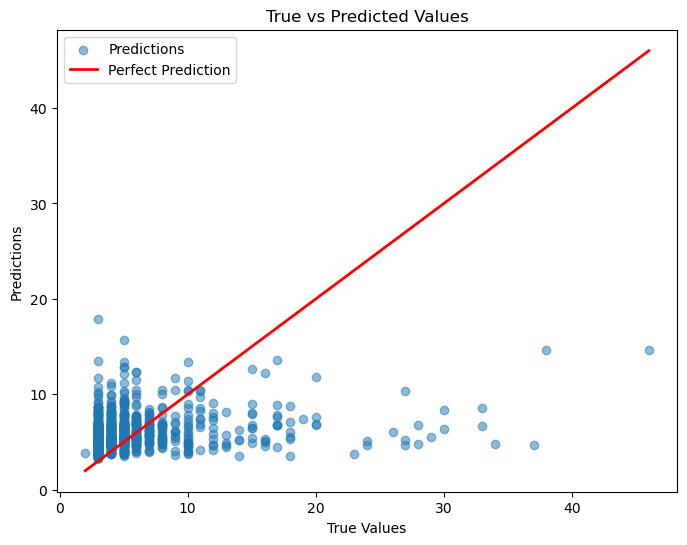

In [13]:
# plot predictions vs actuals for best_params
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()